# Interrater agreement on BPO reviews


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

In [3]:
j0 = pd.read_csv('../bpo/meta/processedmeta/jessicareviewmeta0to100.tsv', sep = '\t', index_col = 'seq')


In [4]:
j0.head()

,PubYear,RecordID,RecordTitle,Title,bookauthor,bookdate,booktitle,isfiction,howpositive,genresnamed,comments
seq,,,,,,,,,,,
0-0,1875.0,8705503,"John Holdsworth, Chief Mate.",The Athenaeum,"Russell, William Clark",1880.0,"John Holdsworth, chief mate",y,4.0,NaN,NaN
0-1,1875.0,8705503,NaN,NaN,"Cunninghame, Richard",NaN,"In Bonds, but Fetterless",y,2.0,NaN,NaN
0-2,1875.0,8705503,NaN,NaN,"Clarke, Marcus Andrew Hislop",NaN,For the Term of his Natural Life,y,3.0,NaN,NaN
1,1807.0,4962734,The Mountain Bard; Consisting of Ballads and s...,"Cabinet, or, monthly report of polite literatu...","Hogg, James",1821.0,The mountain bard ; consisisting of legendary ...,n,NaN,NaN,NaN
2,1892.0,6018300,Book review,Novel review,NaN,NaN,NaN,n,NaN,NaN,NaN


In [5]:
t0 = pd.read_csv('../bpo/meta/processedmeta/tedreviewmeta0to100.tsv', sep = '\t', index_col = 'seq')

In [47]:
nonexistent = 0
matchfic = 0
notmatchfic = 0
tedpos = []
jesspos = []
notmatchers = []

def getrows(ted, jess, nonexistent, matchfic, notmatchfic, tedpos, jesspos, startat):
    global notmatchers
    
    for idx, row in ted.iterrows():
        firstpart = int(idx.split('-')[0])
        if firstpart < startat:
            continue
        elif pd.isnull(row.isfiction):
            continue
            
        if idx not in jess.index:
            nonexistent += 1
            print(idx)
            continue

        if row.isfiction == jess.loc[idx, 'isfiction'] or pd.isnull(jess.loc[idx, 'isfiction']):
            matchfic += 1
        else:
            notmatchfic += 1
            notmatchers.append(idx)

        if row.isfiction == 'y' and jess.loc[idx, 'isfiction'] == 'y':
            t_pos = row['howpositive']
            j_pos = jess.loc[idx, 'howpositive']
            if not pd.isnull(t_pos) and not pd.isnull(j_pos):
                tedpos.append(t_pos)
                jesspos.append(j_pos)

    return nonexistent, matchfic, notmatchfic, tedpos, jesspos


nonexistent, matchfic, notmatchfic, tedpos, jesspos = getrows(t0, j0, nonexistent, matchfic, notmatchfic, tedpos, jesspos, 40)

47
93
99


In [29]:
nonexistent


3

In [30]:
matchfic / (matchfic + notmatchfic)

0.7758620689655172

In [22]:
len(tedpos)

25

In [23]:
pearsonr(tedpos, jesspos)

(0.82791361890696946, 3.2680215684964559e-07)

In [31]:
t1 = pd.read_csv('../bpo/meta/processedmeta/tedreviewmeta100to200.tsv', sep = '\t', index_col = 'seq')
j1 = pd.read_csv('../bpo/meta/processedmeta/jessicareviewmeta100to200.tsv', sep = '\t', index_col = 'seq')

In [48]:
nonexistent, matchfic, notmatchfic, tedpos, jesspos = getrows(t1, j1, nonexistent, 
                                                              matchfic, notmatchfic, tedpos, jesspos, 0)

110
117
117


In [49]:
matchfic / (matchfic + notmatchfic)

0.8543689320388349

In [34]:
len(tedpos)

50

In [35]:
pearsonr(tedpos, jesspos)

(0.77675147848166781, 3.3512051601143181e-11)

In [38]:
alpha = np.random.random(50) / 2 - 0.25
beta = np.random.random(50) / 2 - 0.25

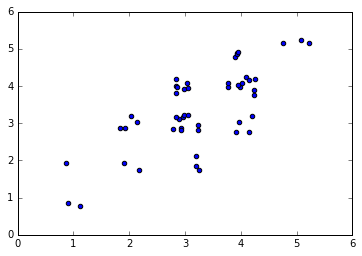

In [39]:
plt.scatter(np.array(tedpos) + alpha, np.array(jesspos) + beta)

array([ 0.17162467, -0.13638423, -0.23978   , -0.09160307, -0.0146713 ,
        0.10096783, -0.03701623, -0.16597979, -0.09683601, -0.16146517,
        0.07996337, -0.2083406 ,  0.02661562, -0.06488378,  0.23688047,
       -0.09047144, -0.06493214, -0.01606129, -0.22554955, -0.06399238,
       -0.01549706, -0.15193646, -0.14678728, -0.04312094, -0.23610544,
        0.23086109, -0.16383272,  0.14243939,  0.14847701,  0.24975938,
        0.23260377, -0.10592887,  0.01496575,  0.19610262, -0.074698  ,
       -0.07851086,  0.19239484, -0.03702411,  0.2083478 ,  0.05428294,
        0.04241326, -0.09595121,  0.13378504, -0.04758086,  0.23153069,
        0.22715315,  0.11514898,  0.24608089,  0.06195054, -0.16187689])

In [41]:
np.average(tedpos)

3.2400000000000002

In [42]:
np.average(jesspos)

3.4199999999999999

In [46]:
notmatchers

['41',
 '42',
 '46',
 '50',
 '67-0',
 '67-1',
 '75',
 '77',
 '78',
 '79',
 '83',
 '91',
 '94',
 '105',
 '106',
 '111',
 '112',
 '116',
 '119',
 '121',
 '128',
 '129',
 '140',
 '141']